# Libraries

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
sns.set()
import matplotlib.pyplot as plt
%matplotlib inline
import statsmodels as sm

In [3]:
df = pd.read_excel("loan.xlsx")
df.head()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit
0,1077501,1296599,5000,5000,4975.0,36 months,0.1065,162.87,B,B2,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
1,1077430,1314167,2500,2500,2500.0,60 months,0.1527,59.83,C,C4,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
2,1077175,1313524,2400,2400,2400.0,36 months,0.1596,84.33,C,C5,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
3,1076863,1277178,10000,10000,10000.0,36 months,0.1349,339.31,C,C1,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
4,1075358,1311748,3000,3000,3000.0,60 months,0.1269,67.79,B,B5,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN


# Feature engineering

In [4]:
nacols = df.columns[df.isnull().all()]
nacols

Index(['mths_since_last_major_derog', 'annual_inc_joint', 'dti_joint',
       'verification_status_joint', 'tot_coll_amt', 'tot_cur_bal',
       'open_acc_6m', 'open_il_6m', 'open_il_12m', 'open_il_24m',
       'mths_since_rcnt_il', 'total_bal_il', 'il_util', 'open_rv_12m',
       'open_rv_24m', 'max_bal_bc', 'all_util', 'total_rev_hi_lim', 'inq_fi',
       'total_cu_tl', 'inq_last_12m', 'acc_open_past_24mths', 'avg_cur_bal',
       'bc_open_to_buy', 'bc_util', 'mo_sin_old_il_acct',
       'mo_sin_old_rev_tl_op', 'mo_sin_rcnt_rev_tl_op', 'mo_sin_rcnt_tl',
       'mort_acc', 'mths_since_recent_bc', 'mths_since_recent_bc_dlq',
       'mths_since_recent_inq', 'mths_since_recent_revol_delinq',
       'num_accts_ever_120_pd', 'num_actv_bc_tl', 'num_actv_rev_tl',
       'num_bc_sats', 'num_bc_tl', 'num_il_tl', 'num_op_rev_tl',
       'num_rev_accts', 'num_rev_tl_bal_gt_0', 'num_sats', 'num_tl_120dpd_2m',
       'num_tl_30dpd', 'num_tl_90g_dpd_24m', 'num_tl_op_past_12m',
       'pct_tl_nvr_dl

In [5]:
len(nacols)

54

**There are 54 null columns in our dataset and there might be some with empty values, we will get rid of these columns**

In [5]:
threshold = 0.7

#Dropping columns with missing value rate higher than threshold
df1 = df[df.columns[df.isnull().mean() < threshold]]

df1.head()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,last_pymnt_amnt,last_credit_pull_d,collections_12_mths_ex_med,policy_code,application_type,acc_now_delinq,chargeoff_within_12_mths,delinq_amnt,pub_rec_bankruptcies,tax_liens
0,1077501,1296599,5000,5000,4975.0,36 months,0.1065,162.87,B,B2,...,171.62,2016-05-01,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0
1,1077430,1314167,2500,2500,2500.0,60 months,0.1527,59.83,C,C4,...,119.66,2013-09-01,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0
2,1077175,1313524,2400,2400,2400.0,36 months,0.1596,84.33,C,C5,...,649.91,2016-05-01,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0
3,1076863,1277178,10000,10000,10000.0,36 months,0.1349,339.31,C,C1,...,357.48,2016-04-01,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0
4,1075358,1311748,3000,3000,3000.0,60 months,0.1269,67.79,B,B5,...,67.79,2016-05-01,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0


**Since the data consists of float, int, object etc, let's seperate the numerical and categorical columns**

# Numerical imputation

In [6]:
df1_num = df1.select_dtypes(include = ['float64', 'int64'])

df1_num = df1_num.drop(["id", "member_id"], axis = 1) # id and member_id cols are categorical

df1_num.head()

,loan_amnt,funded_amnt,funded_amnt_inv,int_rate,installment,annual_inc,dti,delinq_2yrs,inq_last_6mths,mths_since_last_delinq,...,recoveries,collection_recovery_fee,last_pymnt_amnt,collections_12_mths_ex_med,policy_code,acc_now_delinq,chargeoff_within_12_mths,delinq_amnt,pub_rec_bankruptcies,tax_liens
0,5000,5000,4975.0,0.1065,162.87,24000.0,27.65,0,1,NaN,...,0.00,0.00,171.62,0.0,1,0,0.0,0,0.0,0.0
1,2500,2500,2500.0,0.1527,59.83,30000.0,1.00,0,5,NaN,...,117.08,1.11,119.66,0.0,1,0,0.0,0,0.0,0.0
2,2400,2400,2400.0,0.1596,84.33,12252.0,8.72,0,2,NaN,...,0.00,0.00,649.91,0.0,1,0,0.0,0,0.0,0.0
3,10000,10000,10000.0,0.1349,339.31,49200.0,20.00,0,1,35.0,...,0.00,0.00,357.48,0.0,1,0,0.0,0,0.0,0.0
4,3000,3000,3000.0,0.1269,67.79,80000.0,17.94,0,0,38.0,...,0.00,0.00,67.79,0.0,1,0,0.0,0,0.0,0.0


In [7]:
# Missing numerical values are replaced by medians, mean can also replace them but outliers of the data would get included too
df1_num = df1_num.fillna(df1_num.median())
df1_num.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39717 entries, 0 to 39716
Data columns (total 32 columns):
loan_amnt                     39717 non-null int64
funded_amnt                   39717 non-null int64
funded_amnt_inv               39717 non-null float64
int_rate                      39717 non-null float64
installment                   39717 non-null float64
annual_inc                    39717 non-null float64
dti                           39717 non-null float64
delinq_2yrs                   39717 non-null int64
inq_last_6mths                39717 non-null int64
mths_since_last_delinq        39717 non-null float64
open_acc                      39717 non-null int64
pub_rec                       39717 non-null int64
revol_bal                     39717 non-null int64
revol_util                    39717 non-null float64
total_acc                     39717 non-null int64
out_prncp                     39717 non-null float64
out_prncp_inv                 39717 non-null float64
total_

# Categorical imputation

In [8]:
df1_cat = df1.select_dtypes(include = ['object', 'datetime64[ns]'])

df1_cat.head()

,term,grade,sub_grade,emp_title,emp_length,home_ownership,verification_status,issue_d,loan_status,pymnt_plan,...,desc,purpose,title,zip_code,addr_state,earliest_cr_line,initial_list_status,last_pymnt_d,last_credit_pull_d,application_type
0,36 months,B,B2,NaN,10+ years,RENT,Verified,2011-12-01,Fully Paid,n,...,Borrower added on 12/22/11 > I need to upgra...,credit_card,Computer,860xx,AZ,1985-01-01,f,2015-01-01,2016-05-01,INDIVIDUAL
1,60 months,C,C4,Ryder,< 1 year,RENT,Source Verified,2011-12-01,Charged Off,n,...,Borrower added on 12/22/11 > I plan to use t...,car,bike,309xx,GA,1999-04-01,f,2013-04-01,2013-09-01,INDIVIDUAL
2,36 months,C,C5,NaN,10+ years,RENT,Not Verified,2011-12-01,Fully Paid,n,...,NaN,small_business,real estate business,606xx,IL,2001-11-01,f,2014-06-01,2016-05-01,INDIVIDUAL
3,36 months,C,C1,AIR RESOURCES BOARD,10+ years,RENT,Source Verified,2011-12-01,Fully Paid,n,...,Borrower added on 12/21/11 > to pay for prop...,other,personel,917xx,CA,1996-02-01,f,2015-01-01,2016-04-01,INDIVIDUAL
4,60 months,B,B5,University Medical Group,1 year,RENT,Source Verified,2011-12-01,Current,n,...,Borrower added on 12/21/11 > I plan on combi...,other,Personal,972xx,OR,1996-01-01,f,2016-05-01,2016-05-01,INDIVIDUAL


In [9]:
df1_cat.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39717 entries, 0 to 39716
Data columns (total 21 columns):
term                   39717 non-null object
grade                  39717 non-null object
sub_grade              39717 non-null object
emp_title              37258 non-null object
emp_length             38642 non-null object
home_ownership         39717 non-null object
verification_status    39717 non-null object
issue_d                39717 non-null datetime64[ns]
loan_status            39717 non-null object
pymnt_plan             39717 non-null object
url                    39717 non-null object
desc                   26777 non-null object
purpose                39717 non-null object
title                  39705 non-null object
zip_code               39717 non-null object
addr_state             39717 non-null object
earliest_cr_line       39717 non-null datetime64[ns]
initial_list_status    39717 non-null object
last_pymnt_d           39646 non-null datetime64[ns]
last_credit_

In [10]:
df1_cat.isnull().sum()

term                       0
grade                      0
sub_grade                  0
emp_title               2459
emp_length              1075
home_ownership             0
verification_status        0
issue_d                    0
loan_status                0
pymnt_plan                 0
url                        0
desc                   12940
purpose                    0
title                     12
zip_code                   0
addr_state                 0
earliest_cr_line           0
initial_list_status        0
last_pymnt_d              71
last_credit_pull_d         2
application_type           0
dtype: int64

In [11]:
df1_cat = df1_cat.fillna(df1_cat.mode())
df1_cat.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39717 entries, 0 to 39716
Data columns (total 21 columns):
term                   39717 non-null object
grade                  39717 non-null object
sub_grade              39717 non-null object
emp_title              37259 non-null object
emp_length             38642 non-null object
home_ownership         39717 non-null object
verification_status    39717 non-null object
issue_d                39717 non-null datetime64[ns]
loan_status            39717 non-null object
pymnt_plan             39717 non-null object
url                    39717 non-null object
desc                   26777 non-null object
purpose                39717 non-null object
title                  39705 non-null object
zip_code               39717 non-null object
addr_state             39717 non-null object
earliest_cr_line       39717 non-null datetime64[ns]
initial_list_status    39717 non-null object
last_pymnt_d           39646 non-null datetime64[ns]
last_credit_

In [12]:
n_emp = df1_cat["emp_title"].nunique()
print(n_emp)

n_desc = df1_cat["desc"].nunique()
print(n_desc)

n_title = df1_cat["title"].nunique()
print(n_title)

n_url = df1_cat["url"].nunique()
print(n_url)

28820
26527
19612
39717


**Above cell shows us the no.of unique values in few categorical columns, since they are very high, we have to drop them**

In [13]:
df1_cat = df1_cat.drop(["emp_title", "desc", "title", "url"], axis = 1)
df1_cat.head()

,term,grade,sub_grade,emp_length,home_ownership,verification_status,issue_d,loan_status,pymnt_plan,purpose,zip_code,addr_state,earliest_cr_line,initial_list_status,last_pymnt_d,last_credit_pull_d,application_type
0,36 months,B,B2,10+ years,RENT,Verified,2011-12-01,Fully Paid,n,credit_card,860xx,AZ,1985-01-01,f,2015-01-01,2016-05-01,INDIVIDUAL
1,60 months,C,C4,< 1 year,RENT,Source Verified,2011-12-01,Charged Off,n,car,309xx,GA,1999-04-01,f,2013-04-01,2013-09-01,INDIVIDUAL
2,36 months,C,C5,10+ years,RENT,Not Verified,2011-12-01,Fully Paid,n,small_business,606xx,IL,2001-11-01,f,2014-06-01,2016-05-01,INDIVIDUAL
3,36 months,C,C1,10+ years,RENT,Source Verified,2011-12-01,Fully Paid,n,other,917xx,CA,1996-02-01,f,2015-01-01,2016-04-01,INDIVIDUAL
4,60 months,B,B5,1 year,RENT,Source Verified,2011-12-01,Current,n,other,972xx,OR,1996-01-01,f,2016-05-01,2016-05-01,INDIVIDUAL


In [14]:
df1_cat.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39717 entries, 0 to 39716
Data columns (total 17 columns):
term                   39717 non-null object
grade                  39717 non-null object
sub_grade              39717 non-null object
emp_length             38642 non-null object
home_ownership         39717 non-null object
verification_status    39717 non-null object
issue_d                39717 non-null datetime64[ns]
loan_status            39717 non-null object
pymnt_plan             39717 non-null object
purpose                39717 non-null object
zip_code               39717 non-null object
addr_state             39717 non-null object
earliest_cr_line       39717 non-null datetime64[ns]
initial_list_status    39717 non-null object
last_pymnt_d           39646 non-null datetime64[ns]
last_credit_pull_d     39715 non-null datetime64[ns]
application_type       39717 non-null object
dtypes: datetime64[ns](4), object(13)
memory usage: 5.2+ MB


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000000000CE215F8>,
      dtype=object)

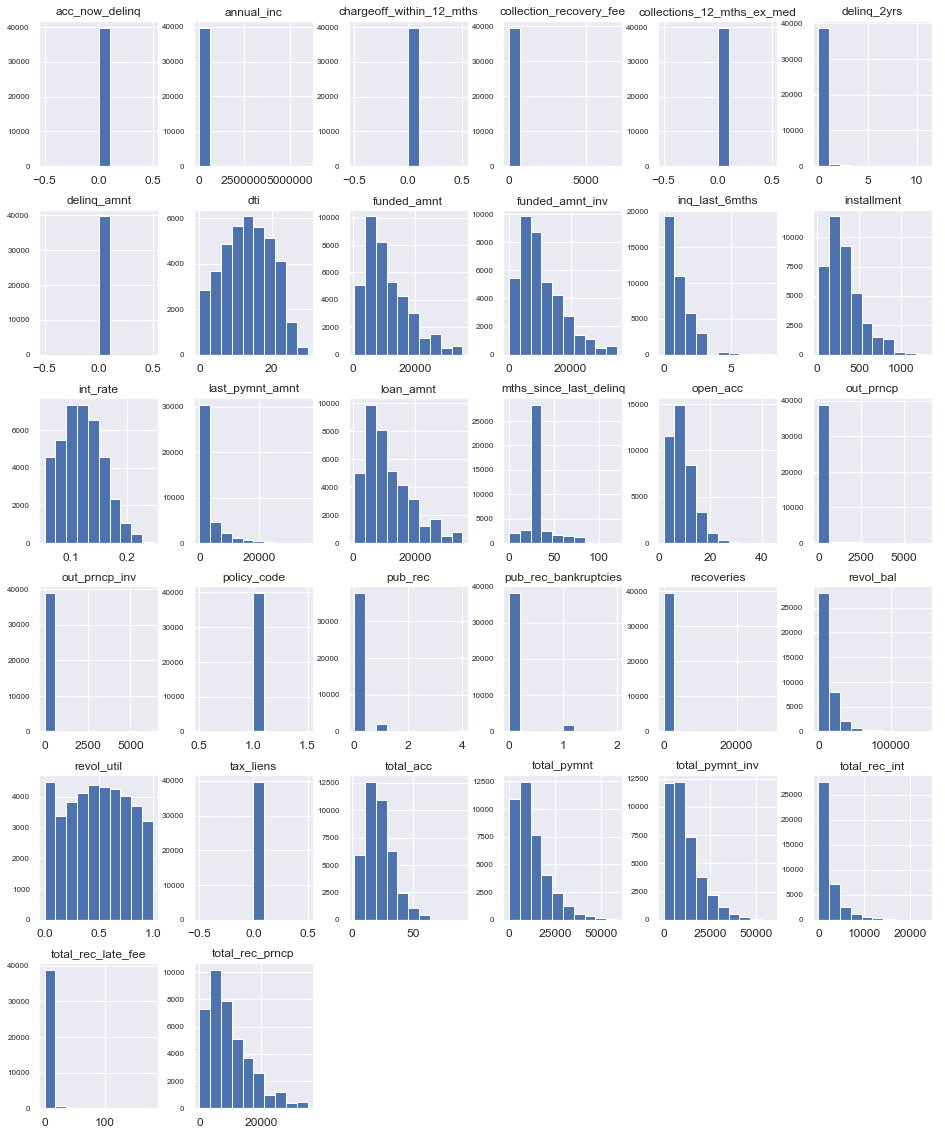

In [15]:
df1_num.hist(figsize = (16, 20), xlabelsize = 12, ylabelsize = 8)

In [16]:
df1_num.columns

Index(['loan_amnt', 'funded_amnt', 'funded_amnt_inv', 'int_rate',
       'installment', 'annual_inc', 'dti', 'delinq_2yrs', 'inq_last_6mths',
       'mths_since_last_delinq', 'open_acc', 'pub_rec', 'revol_bal',
       'revol_util', 'total_acc', 'out_prncp', 'out_prncp_inv', 'total_pymnt',
       'total_pymnt_inv', 'total_rec_prncp', 'total_rec_int',
       'total_rec_late_fee', 'recoveries', 'collection_recovery_fee',
       'last_pymnt_amnt', 'collections_12_mths_ex_med', 'policy_code',
       'acc_now_delinq', 'chargeoff_within_12_mths', 'delinq_amnt',
       'pub_rec_bankruptcies', 'tax_liens'],
      dtype='object')

In [17]:
len(df1_num.columns)

32

# Handling outliers

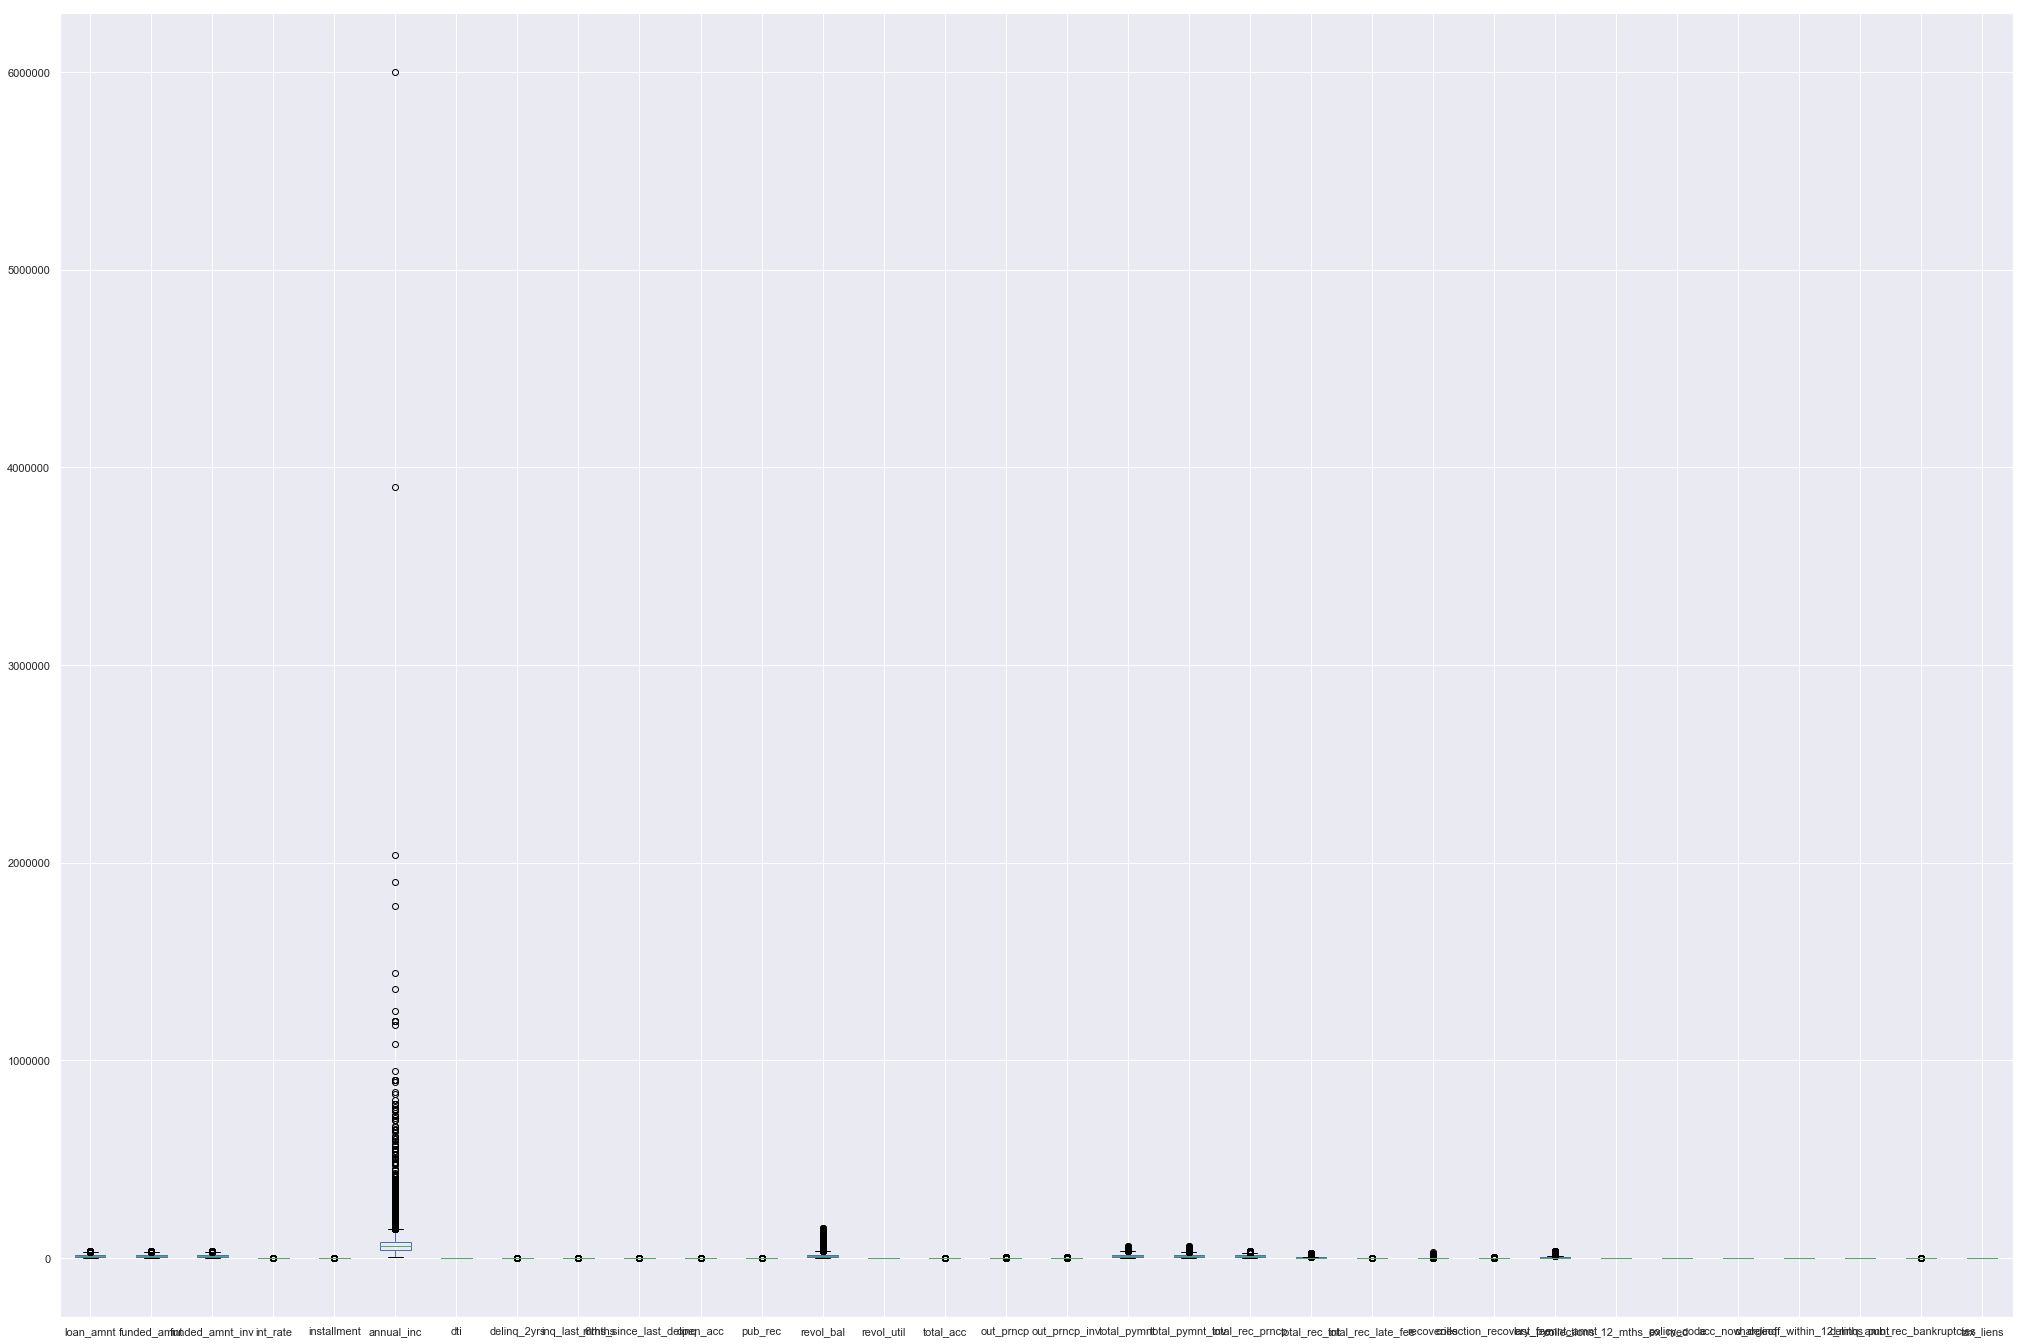

In [18]:
df1_num.boxplot(figsize = (35, 24))

**The boxplot created is hard to visualize due to many cols, we will split it in to 2 for proper visualization**

In [19]:
df1_num1 = df1_num.iloc[:, 0:15]
df1_num1.head()

,loan_amnt,funded_amnt,funded_amnt_inv,int_rate,installment,annual_inc,dti,delinq_2yrs,inq_last_6mths,mths_since_last_delinq,open_acc,pub_rec,revol_bal,revol_util,total_acc
0,5000,5000,4975.0,0.1065,162.87,24000.0,27.65,0,1,34.0,3,0,13648,0.837,9
1,2500,2500,2500.0,0.1527,59.83,30000.0,1.00,0,5,34.0,3,0,1687,0.094,4
2,2400,2400,2400.0,0.1596,84.33,12252.0,8.72,0,2,34.0,2,0,2956,0.985,10
3,10000,10000,10000.0,0.1349,339.31,49200.0,20.00,0,1,35.0,10,0,5598,0.210,37
4,3000,3000,3000.0,0.1269,67.79,80000.0,17.94,0,0,38.0,15,0,27783,0.539,38


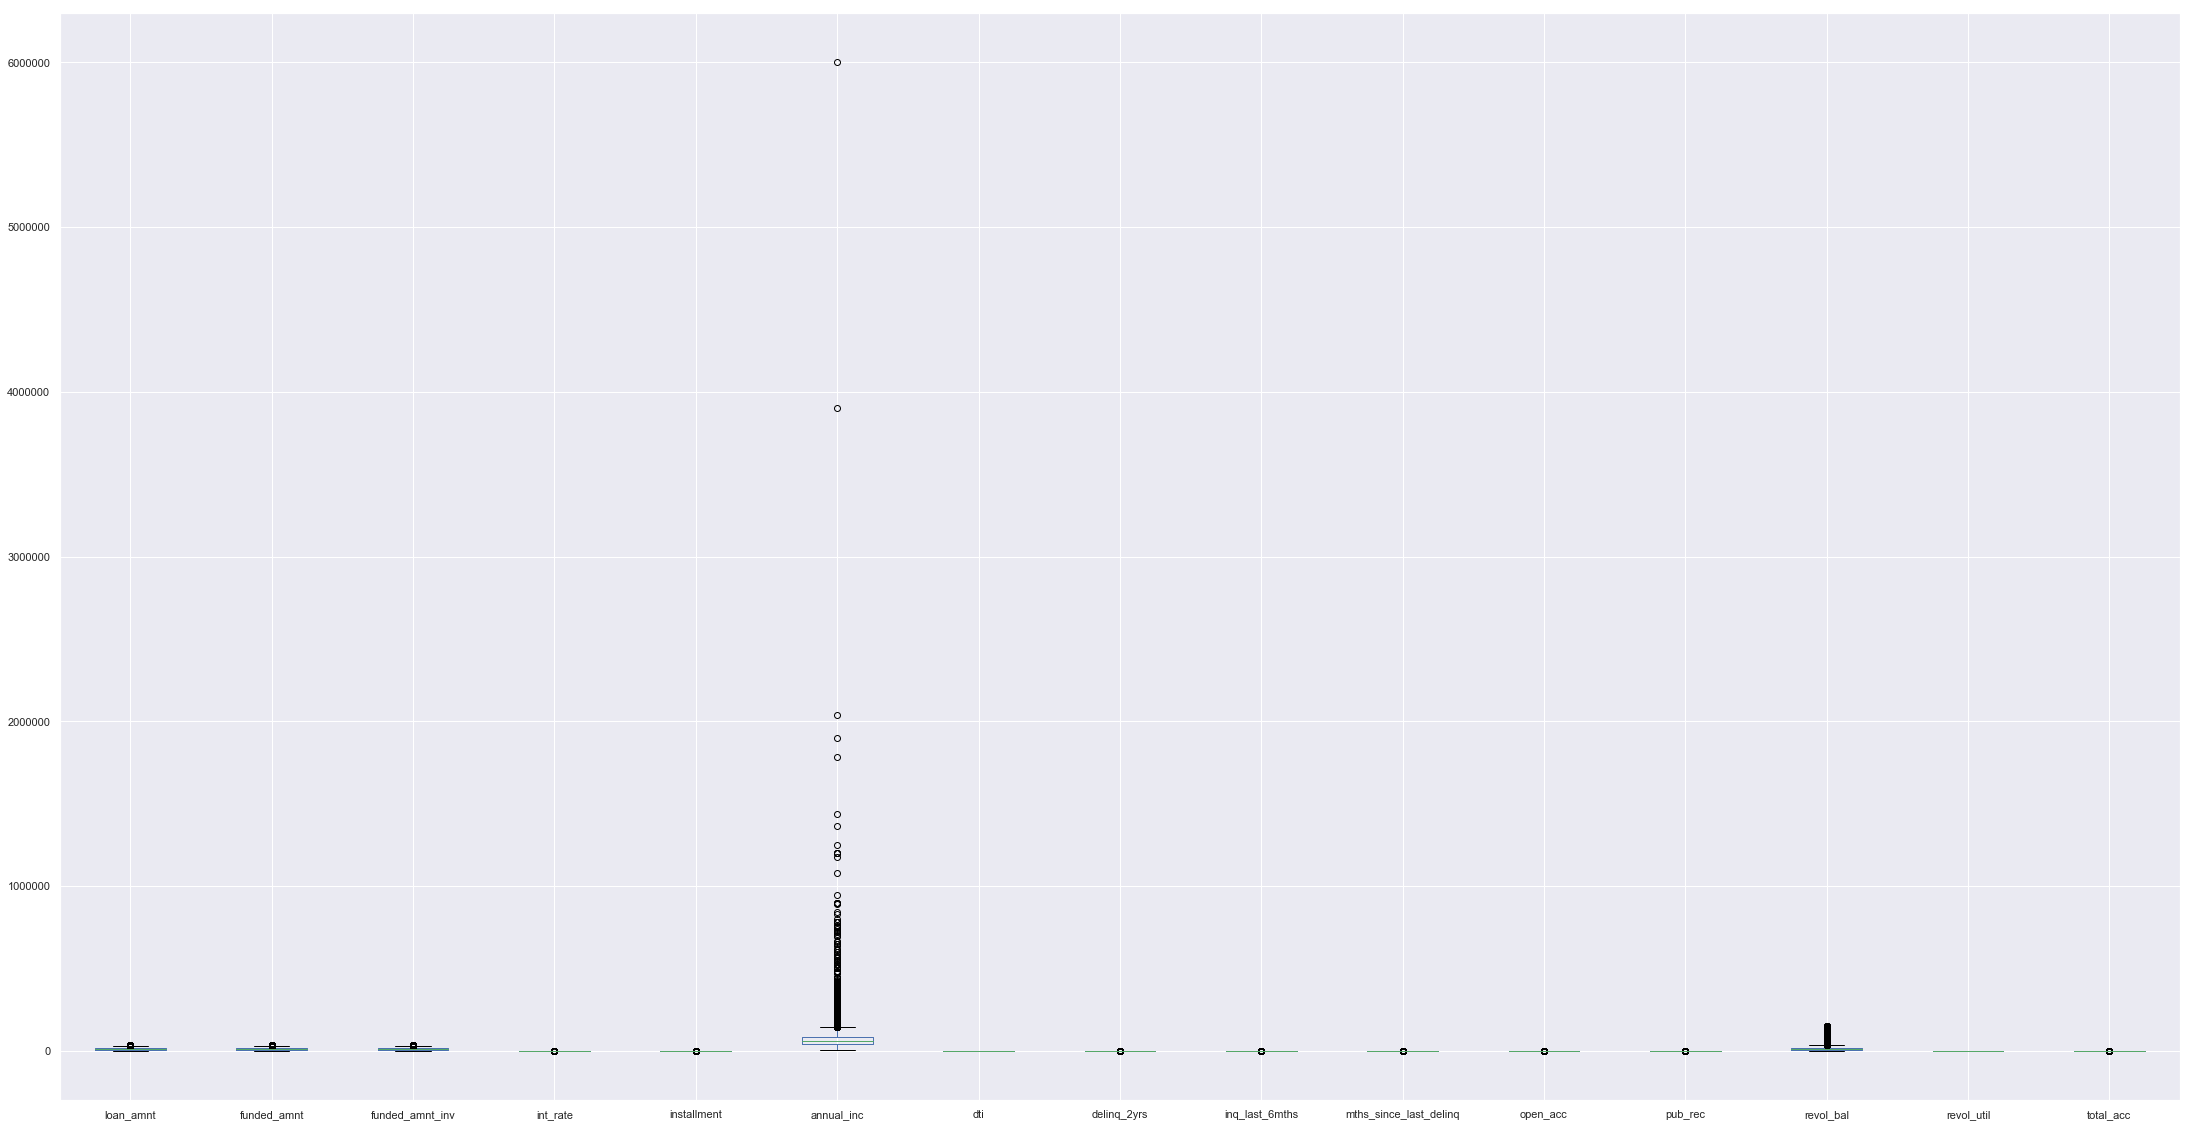

In [20]:
df1_num1.boxplot(figsize = (38,20))

In [21]:
df1_num2 = df1_num.iloc[:, 16:]
df1_num2.head()

,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_amnt,collections_12_mths_ex_med,policy_code,acc_now_delinq,chargeoff_within_12_mths,delinq_amnt,pub_rec_bankruptcies,tax_liens
0,0.00,5863.155187,5833.84,5000.00,863.16,0.00,0.00,0.00,171.62,0.0,1,0,0.0,0,0.0,0.0
1,0.00,1008.710000,1008.71,456.46,435.17,0.00,117.08,1.11,119.66,0.0,1,0,0.0,0,0.0,0.0
2,0.00,3005.666844,3005.67,2400.00,605.67,0.00,0.00,0.00,649.91,0.0,1,0,0.0,0,0.0,0.0
3,0.00,12231.890000,12231.89,10000.00,2214.92,16.97,0.00,0.00,357.48,0.0,1,0,0.0,0,0.0,0.0
4,524.06,3513.330000,3513.33,2475.94,1037.39,0.00,0.00,0.00,67.79,0.0,1,0,0.0,0,0.0,0.0


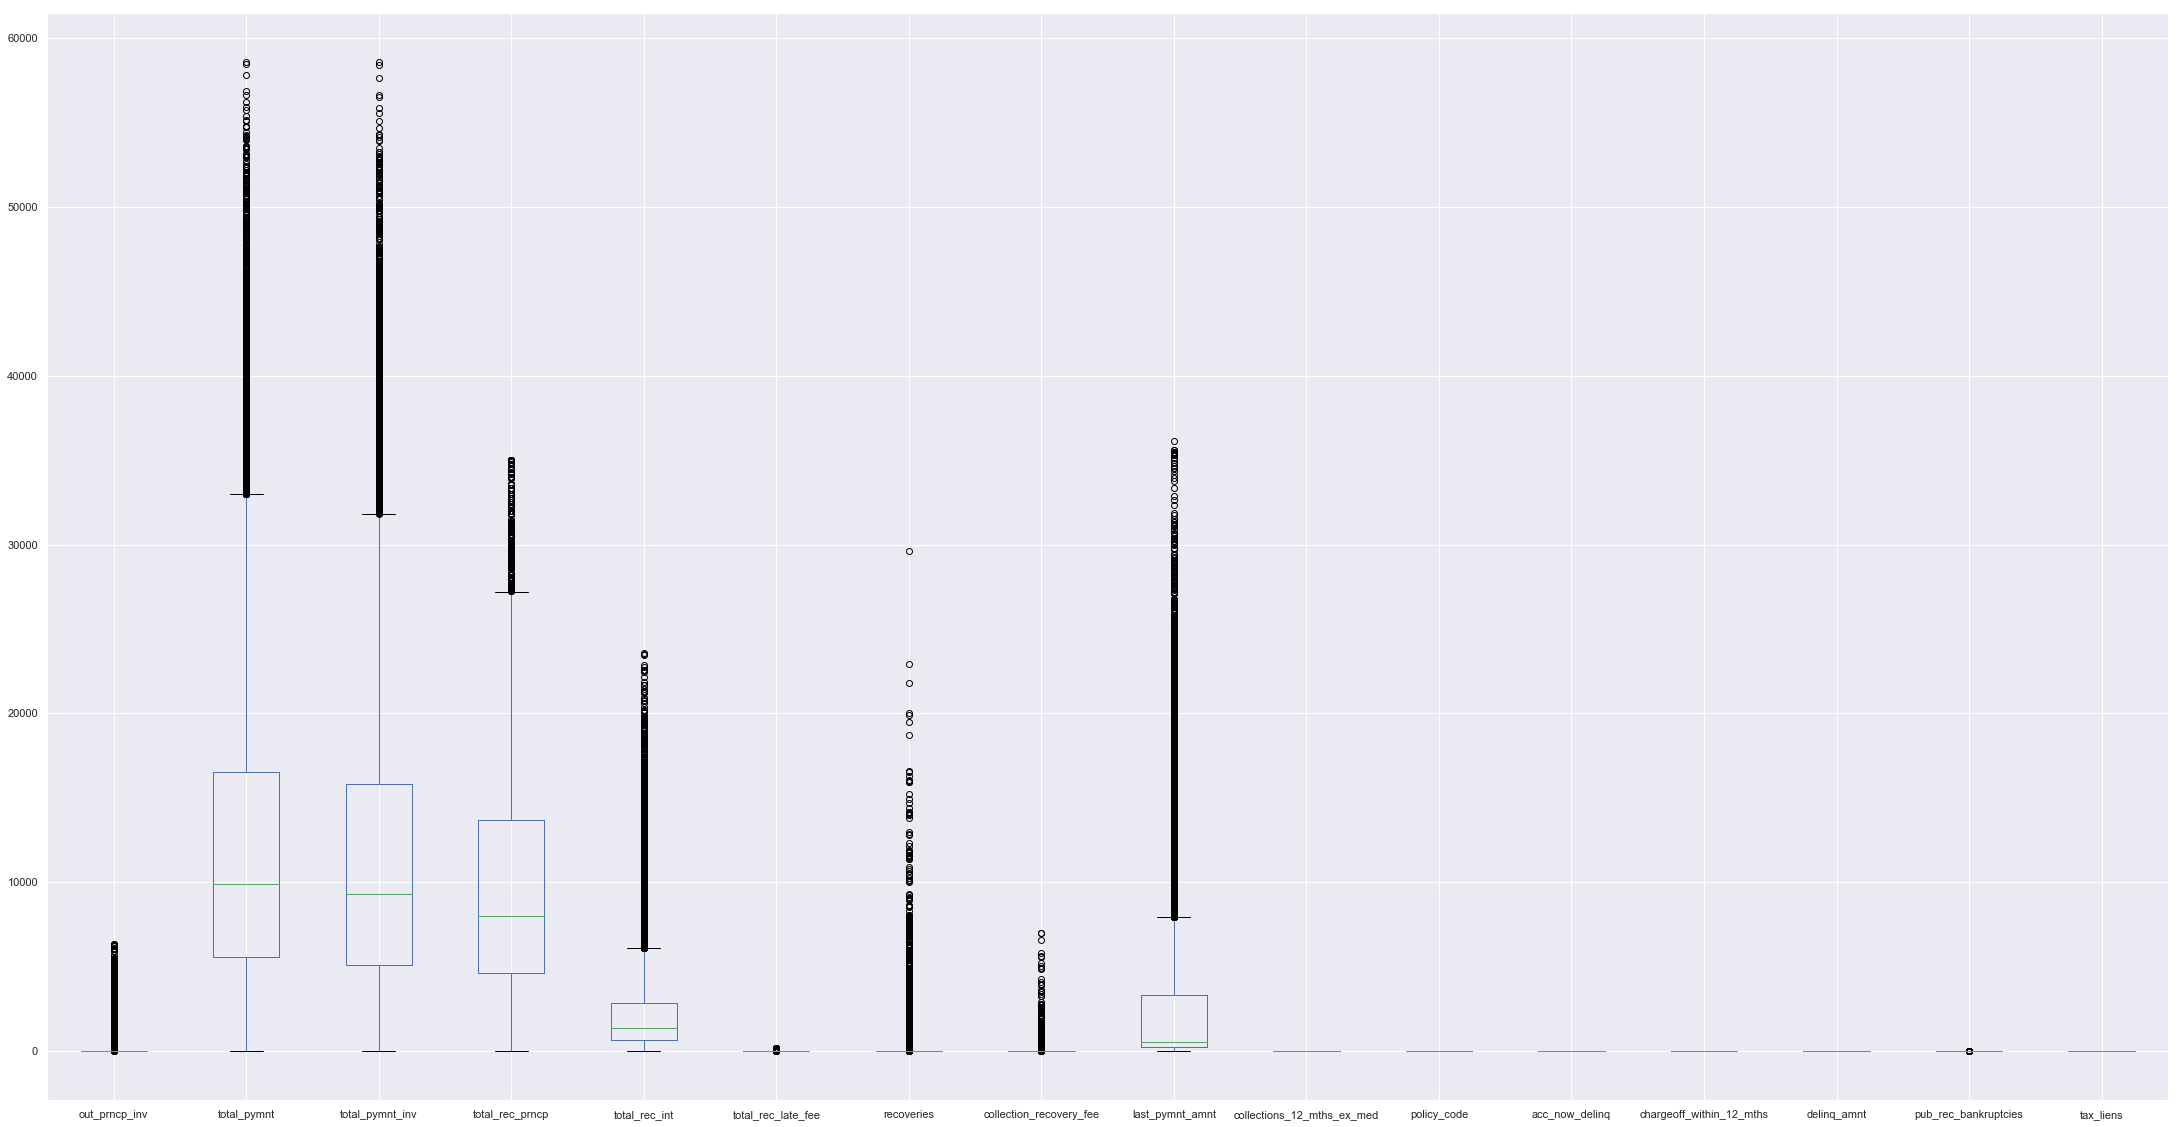

In [22]:
df1_num2.boxplot(figsize = (38,20))

**The boxplots of both the halves shows us the presence of outliers. Let's get rid of it**

In [23]:
upper_lim = df1_num[["annual_inc", "revol_bal", "out_prncp_inv", 'total_pymnt', 'total_pymnt_inv', 'total_rec_prncp',
                    'total_rec_int', 'recoveries', 'collection_recovery_fee', 'last_pymnt_amnt']].quantile(.95)

lower_lim = df1_num[["annual_inc", "revol_bal", "out_prncp_inv", 'total_pymnt', 'total_pymnt_inv', 'total_rec_prncp',
                    'total_rec_int', 'recoveries', 'collection_recovery_fee', 'last_pymnt_amnt']].quantile(.05)

In [24]:
upper_lim

annual_inc                 142000.00000
revol_bal                   41656.40000
out_prncp_inv                   0.00000
total_pymnt                 30245.11853
total_pymnt_inv             29627.23600
total_rec_prncp             24999.98200
total_rec_int                7575.81200
recoveries                    362.41800
collection_recovery_fee         5.15200
last_pymnt_amnt             12183.94400
Name: 0.95, dtype: float64

In [25]:
lower_lim

annual_inc                 24000.000000
revol_bal                    321.800000
out_prncp_inv                  0.000000
total_pymnt                 1887.957036
total_pymnt_inv             1420.408000
total_rec_prncp             1339.842000
total_rec_int                186.168000
recoveries                     0.000000
collection_recovery_fee        0.000000
last_pymnt_amnt               43.340000
Name: 0.05, dtype: float64

In [26]:
dfn = (df1_num[["annual_inc", "revol_bal", "out_prncp_inv", 'total_pymnt', 'total_pymnt_inv', 'total_rec_prncp',
                    'total_rec_int', 'recoveries', 'collection_recovery_fee', 'last_pymnt_amnt']] < upper_lim) & (df1_num[["annual_inc", "revol_bal", "out_prncp_inv", 'total_pymnt', 'total_pymnt_inv', 'total_rec_prncp',
                    'total_rec_int', 'recoveries', 'collection_recovery_fee', 'last_pymnt_amnt']] > lower_lim)

dfn.head()

,annual_inc,revol_bal,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,recoveries,collection_recovery_fee,last_pymnt_amnt
0,False,True,False,True,True,True,True,False,False,True
1,True,True,False,False,False,False,True,True,True,True
2,False,True,False,True,True,True,True,False,False,True
3,True,True,False,True,True,True,True,False,False,True
4,True,True,False,True,True,True,True,False,False,True


In [27]:
dfn.shape

(39717, 10)

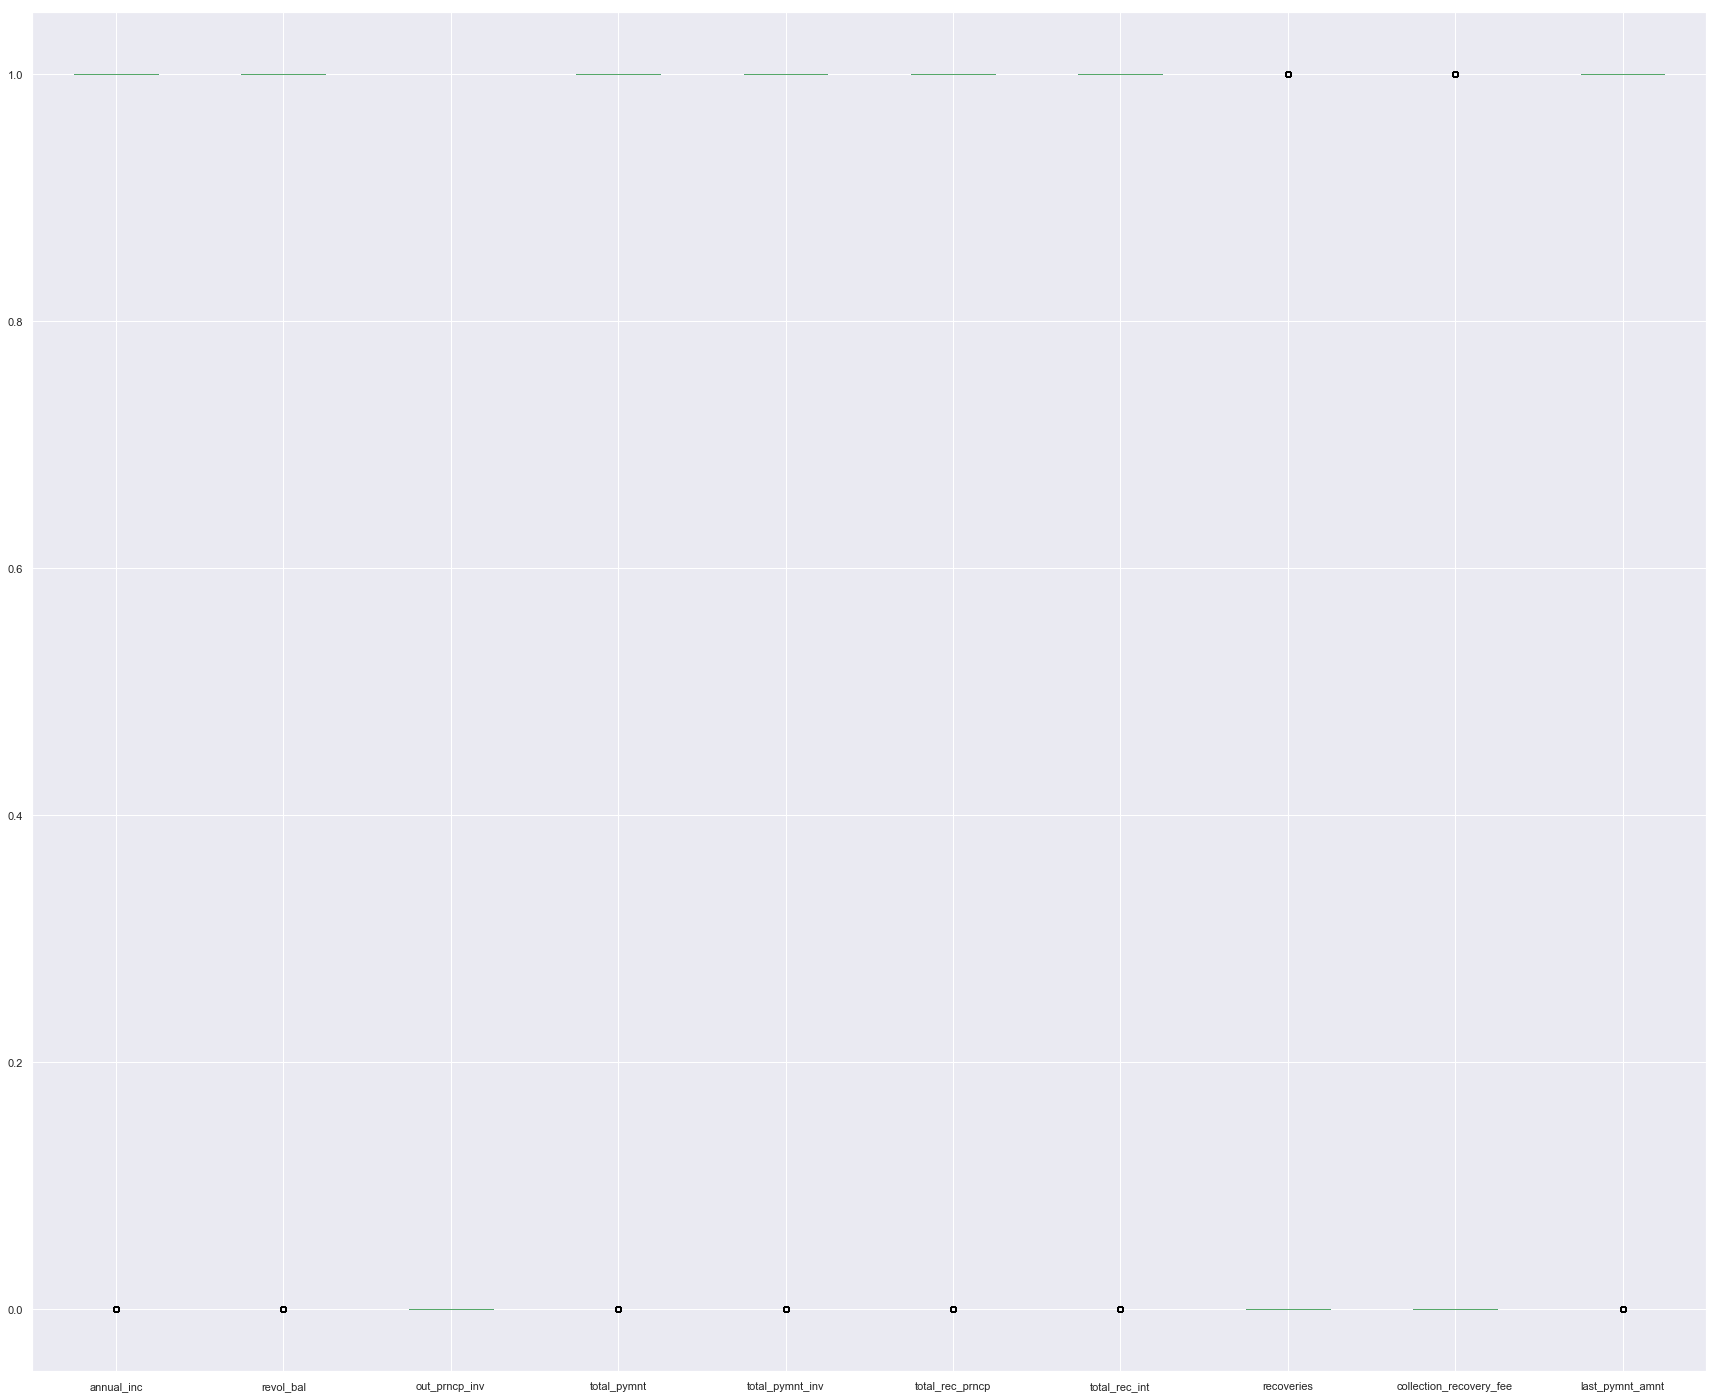

In [28]:
dfn.boxplot(figsize = (30,25))

**We can see, the outliers have been removed**

# Binning

**Binning is done to prevent the model from overfitting. It can be done on categorical as well as numerical data**

In [29]:
df1_num["loan_amnt"].max()

35000

In [30]:
df1_num["loan_amnt"].min()

500

In [31]:
np.linspace(500,35000,5)

array([  500.,  9125., 17750., 26375., 35000.])

In [32]:
df1_num1['bin'] = pd.cut(df1_num1['loan_amnt'], bins = [500,9125,17750,26375,35000],
                         labels = ["Low", "Mid", "High", "Extremely High"])

In [33]:
df1_num1[["loan_amnt", "bin"]].head(12)

,loan_amnt,bin
0,5000,Low
1,2500,Low
2,2400,Low
3,10000,Mid
4,3000,Low
5,5000,Low
6,7000,Low
7,3000,Low
8,5600,Low
9,5375,Low


In [35]:
df1_num1.loc[df1_num1.bin == "Mid"].head()

,loan_amnt,funded_amnt,funded_amnt_inv,int_rate,installment,annual_inc,dti,delinq_2yrs,inq_last_6mths,mths_since_last_delinq,open_acc,pub_rec,revol_bal,revol_util,total_acc,bin
3,10000,10000,10000.0,0.1349,339.31,49200.00,20.00,0,1,35.0,10,0,5598,0.210,37,Mid
11,12000,12000,12000.0,0.1269,402.54,75000.00,10.78,0,0,34.0,12,0,23336,0.671,34,Mid
14,10000,10000,10000.0,0.1065,325.74,100000.00,7.06,0,2,34.0,14,0,11997,0.555,29,Mid
16,10000,10000,10000.0,0.1527,347.98,42000.00,18.60,0,2,61.0,14,0,24043,0.702,28,Mid
19,9200,9200,9200.0,0.0603,280.01,77385.19,9.86,0,0,34.0,8,0,7314,0.231,28,Mid


# One-hot encoding

**This technique changes the categorical data in to numbers. This is done to make the data understandable for algorithms**

In [36]:
df1_cat_dummies = pd.get_dummies(df1_cat[["home_ownership", "loan_status", "verification_status", "grade"]])
#data = data.join(encoded_columns).drop('column', axis=1)

In [37]:
df1_cat.head()

,term,grade,sub_grade,emp_length,home_ownership,verification_status,issue_d,loan_status,pymnt_plan,purpose,zip_code,addr_state,earliest_cr_line,initial_list_status,last_pymnt_d,last_credit_pull_d,application_type
0,36 months,B,B2,10+ years,RENT,Verified,2011-12-01,Fully Paid,n,credit_card,860xx,AZ,1985-01-01,f,2015-01-01,2016-05-01,INDIVIDUAL
1,60 months,C,C4,< 1 year,RENT,Source Verified,2011-12-01,Charged Off,n,car,309xx,GA,1999-04-01,f,2013-04-01,2013-09-01,INDIVIDUAL
2,36 months,C,C5,10+ years,RENT,Not Verified,2011-12-01,Fully Paid,n,small_business,606xx,IL,2001-11-01,f,2014-06-01,2016-05-01,INDIVIDUAL
3,36 months,C,C1,10+ years,RENT,Source Verified,2011-12-01,Fully Paid,n,other,917xx,CA,1996-02-01,f,2015-01-01,2016-04-01,INDIVIDUAL
4,60 months,B,B5,1 year,RENT,Source Verified,2011-12-01,Current,n,other,972xx,OR,1996-01-01,f,2016-05-01,2016-05-01,INDIVIDUAL


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000000000E49D4E0>,
      dtype=object)

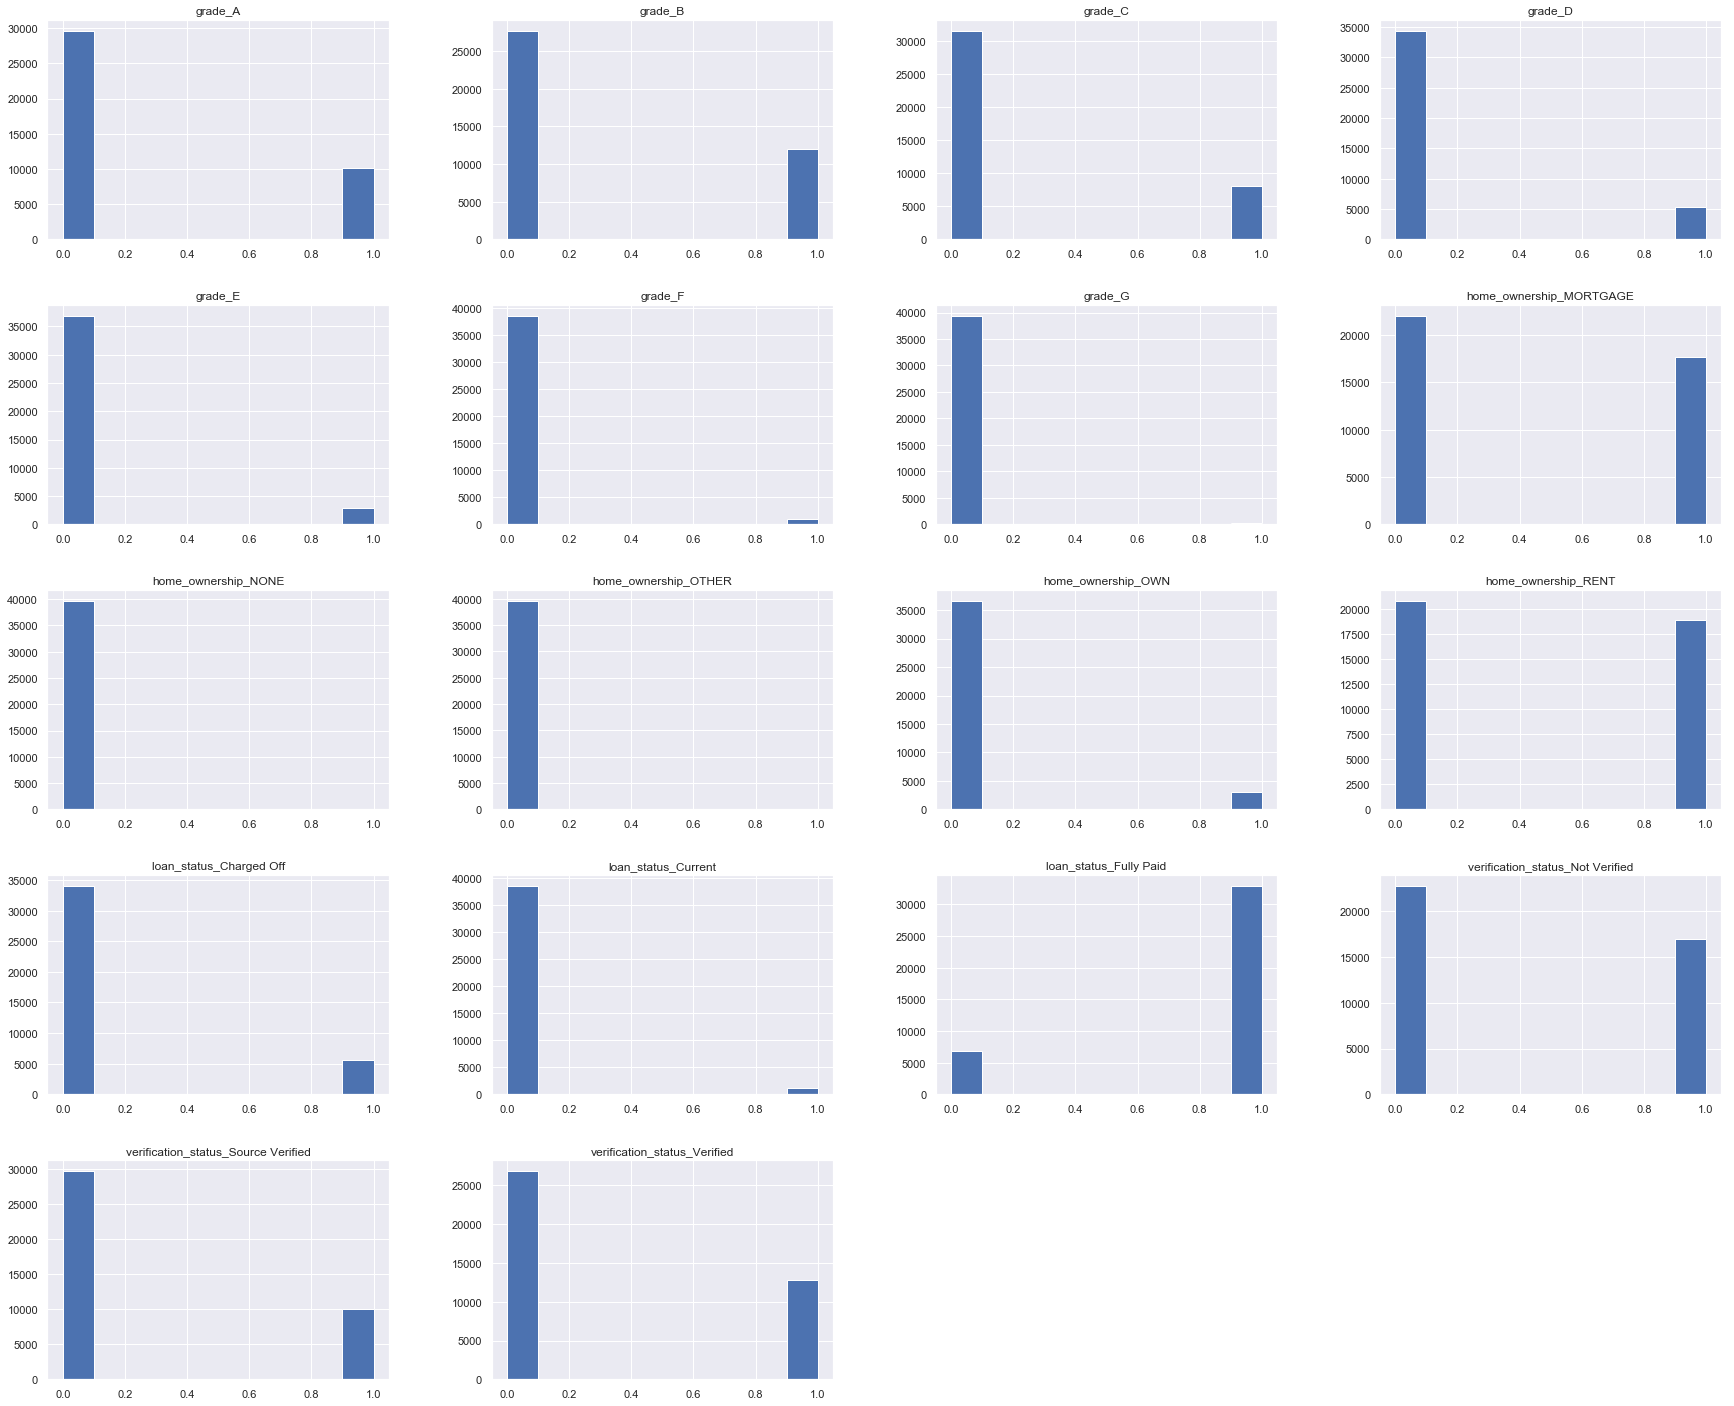

In [38]:
df1_cat_dummies.hist(figsize = (30,25))

# Grouping Operations

In [39]:
df1.groupby('term').agg(lambda x: x.value_counts().index[0])

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,int_rate,installment,grade,sub_grade,emp_title,...,last_pymnt_amnt,last_credit_pull_d,collections_12_mths_ex_med,policy_code,application_type,acc_now_delinq,chargeoff_within_12_mths,delinq_amnt,pub_rec_bankruptcies,tax_liens
term,,,,,,,,,,,,,,,,,,,,,
36 months,1052670,745584,10000,10000,5000.0,0.0751,311.11,A,A4,US Army,...,0.00,2016-05-01,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0
60 months,834630,939511,12000,12000,12000.0,0.1349,276.06,B,B5,US Army,...,276.06,2016-05-01,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0


# Extracting Date

In [75]:
from datetime import date as dt

timestamp = pd.DataFrame(df1_cat["issue_d"])

timestamp["Date"] = pd.to_datetime(df1_cat["issue_d"], format="%Y-%m-%d")

timestamp['Year'] = df1_cat["issue_d"].dt.year

timestamp['Month'] = df1_cat["issue_d"].dt.month

timestamp['Day'] = df1_cat["issue_d"].dt.day_name()

In [76]:
timestamp.drop("issue_d", axis=1)

,Date,Year,Month,Day
0,2011-12-01,2011,12,Thursday
1,2011-12-01,2011,12,Thursday
2,2011-12-01,2011,12,Thursday
3,2011-12-01,2011,12,Thursday
4,2011-12-01,2011,12,Thursday
5,2011-12-01,2011,12,Thursday
6,2011-12-01,2011,12,Thursday
7,2011-12-01,2011,12,Thursday
8,2011-12-01,2011,12,Thursday
9,2011-12-01,2011,12,Thursday


**The rest of the features will be worked on different data**

# Log Transform

In [79]:
dataLT = pd.DataFrame({'value':[32,75, -3, 8, 98, 26, 39, -52]})
dataLT['log(x+1)'] = (dataLT['value']+1).transform(np.log)

#Negative Values Handling
#Note that the values are different
dataLT['log(x-min(x)+1)'] = (dataLT['value']-dataLT['value'].min()+1) .transform(np.log)

In [80]:
dataLT

,value,log(x+1),log(x-min(x)+1)
0,32,3.496508,4.442651
1,75,4.330733,4.852030
2,-3,NaN,3.912023
3,8,2.197225,4.110874
4,98,4.595120,5.017280
5,26,3.295837,4.369448
6,39,3.688879,4.521789
7,-52,NaN,0.000000


# Scaling

**The numerical features of the dataset don't have a certain range and they differ from each other.
We cannot expect age and income columns to have the same range. But from the machine learning point of view these two columns can be compared by scaling**


**Scaling has 2 types: 1. Normalization, 2. Standardization**

**Normalization**

In [48]:
# We will create our own small dataset

data = pd.DataFrame({'value':[32,75, -3, 8, 98, 26, 39, -52]})

data['normalized'] = (data['value'] - data['value'].min()) / (data['value'].max() - data['value'].min())

In [45]:
data

,value,normalized
0,32,0.560000
1,75,0.846667
2,-3,0.326667
3,8,0.400000
4,98,1.000000
5,26,0.520000
6,39,0.606667
7,-52,0.000000


In [46]:
data1 = pd.DataFrame({'value':[32,75, -3, 8, 98, 26, 39, -52]})

data1['standardized'] = (data1['value'] - data1['value'].mean()) / data1['value'].std()

In [47]:
data1

,value,standardized
0,32,0.089078
1,75,1.017648
2,-3,-0.666735
3,8,-0.429194
4,98,1.514324
5,26,-0.040490
6,39,0.240240
7,-52,-1.724872


# Feature Split

In [84]:
name = pd.DataFrame({"Name" : ["Sajid Khan", "Aniket Barate", "Vishal Choudhary", "Abhay Jawale"]})
name

,Name
0,Sajid Khan
1,Aniket Barate
2,Vishal Choudhary
3,Abhay Jawale


In [93]:
name["First Name"] = name.Name.str.split(" ").map(lambda x: x[0])

name["Last Name"] = name.Name.str.split(" ").map(lambda x: x[1])

In [94]:
name

,Name,First Name,Last Name
0,Sajid Khan,Sajid,Khan
1,Aniket Barate,Aniket,Barate
2,Vishal Choudhary,Vishal,Choudhary
3,Abhay Jawale,Abhay,Jawale
